In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
import snap
import networkx

In [3]:
labels=pd.read_csv('../input/stage1_combined_train_variant.csv',index_col=0)['Class'].to_dict()

In [4]:
df =pd.read_csv('stage2_edges_pagelen.txt',header=None)

In [5]:
df.columns=['rawsrc','rawdest','w']
df.shape

(158692, 3)

In [6]:
df.rawsrc.map(lambda u: int(u[2:]) if u.startswith('tr') else 0).max(),df.rawdest.map(lambda u: int(u[2:]) if u.startswith('tr') else 0).max()

(15650, 15628)

In [7]:
df.rawsrc.map(lambda u: int(u[2:]) if u.startswith('te') else 0).max(),df.rawdest.map(lambda u: int(u[2:]) if u.startswith('te') else 0).max()

(986, 986)

In [8]:
df.head()

rawsrc rawdest     w
0   te337   tr701   326
1   te391  tr2498   396
2   te639  tr1717   256
3  tr1265   te574   223
4    te63  tr1826  1642

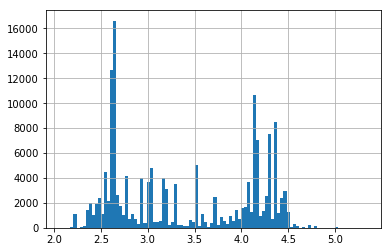

In [9]:
np.log10(df.w).hist(bins=100);

In [10]:
df['src']=df['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))
df['dest']=df['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))

In [11]:
10**2.3

199.52623149688787

In [12]:
filtered_df=df[df.w>200]

In [13]:
subdf=filtered_df.groupby(['rawsrc','rawdest']).count().reset_index()
subdf['src']=subdf['rawsrc'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))
subdf['dest']=subdf['rawdest'].apply(lambda u:  int(u[2:])  if u[:2]=='te' else 100000+int(u[2:]))
subdf.shape

(50297, 5)

In [14]:
nodes=set(pd.concat([subdf['src'],subdf['dest']]))
len(nodes),len([u for u in nodes if u <100000]),len([u for u in nodes if u >=100000])

(3931, 854, 3077)

In [15]:
g=snap.TUNGraph.New()

In [16]:
for n in nodes:
    if True or n>=100000:
        g.AddNode(n)

In [17]:
for row in subdf.values:
    w,u,v=row[2:]
    if w>0 :#and u>10000 and v >10000:
        g.AddEdge(u,v)

In [18]:
Components = snap.TCnComV()
#snap.GetWccs(g, Components)
snap.CommunityCNM(g,Components)
#snap.CommunityGirvanNewman(g,Components)

lst=[]
lst2=[]
for CnCom in Components:
    trainlabels=[nid for nid in CnCom if nid>=100000]
    testlabels=[nid for nid in CnCom if nid<100000]
    
    n1=len([_ for nid in CnCom if nid>=100000])
    cl=[labels[i-100000] for i in  CnCom if i>=100000]
    vc=pd.Series(cl).value_counts()
    vcc=vc.loc[range(1,10)].fillna(0)+1
    p= (vcc/vcc.sum()).tolist()
    lst2+=[[u]+p for u in CnCom]
    if vc.sum()>0: lst.append([CnCom.Len(), n1 ]+ p)
#pd.DataFrame(lst).sort_values(2)

In [19]:
def f(u):
    a=u[2:11]
    b=u[1]
    c=[v*np.log(v) for v in a]
    return np.sum(c)*b
pd.DataFrame(lst).apply(lambda u:f(u),axis=1).sum()/float(len([u for u in nodes if u >=100000]))

-1.6365000817397994

In [20]:
gg=lambda x: -x*np.log(x)-(1-x)*np.log(1./8-x/8)
a=pd.DataFrame(lst)
a['maxp']=np.max(a.values[:,2:11],1)
a['loss']=-a.apply(f,1)/a.loc[:,1]
a['aa']=np.round(a['maxp'].map(gg)-a['loss'],5)
a.sort_values('loss')

0    1         2         3         4         5         6         7  \
16   128  116  0.016000  0.008000  0.048000  0.880000  0.008000  0.008000   
116   52   46  0.054545  0.018182  0.018182  0.800000  0.018182  0.036364   
35   123  112  0.082645  0.016529  0.008264  0.033058  0.123967  0.710744   
117   20   17  0.038462  0.038462  0.038462  0.038462  0.038462  0.692308   
10    98   83  0.010870  0.130435  0.119565  0.021739  0.065217  0.010870   
249   17   16  0.040000  0.040000  0.040000  0.040000  0.040000  0.040000   
278   17   16  0.040000  0.040000  0.040000  0.040000  0.040000  0.040000   
122   30   23  0.031250  0.031250  0.093750  0.031250  0.031250  0.031250   
37    54   46  0.436364  0.018182  0.018182  0.400000  0.018182  0.018182   
8    157  123  0.037879  0.295455  0.060606  0.030303  0.015152  0.015152   
131   17   15  0.041667  0.041667  0.041667  0.041667  0.041667  0.041667   
71    25   22  0.193548  0.032258  0.032258  0.580645  0.032258  0.032258   
27    85   70  0.012658  0.253165  0.037975  0.025316  0.037975  0.088608   
95    54   51  0.016667  0.033333  0.133333  0.150000  0.050000  0.566667   
24   264  235  0.278689  0.004098  0.036885  0.172131  0.401639  0.094262   
256   15   14  0.086957  0.043478  0.043478  0.608696  0.043478  0.043478   
21    56   42  0.039216  0.274510  0.019608  0.058824  0.019608  0.058824   
44    54   41  0.340000  0.020000  0.020000  0.420000  0.100000  0.040000   
33    60   42  0.098039  0.117647  0.039216  0.117647  0.019608  0.019608   
7     33   27  0.055556  0.027778  0.138889  0.027778  0.111111  0.027778   
54    58   46  0.454545  0.072727  0.018182  0.254545  0.018182  0.018182   
111   20   17  0.038462  0.192308  0.038462  0.038462  0.038462  0.038462   
48    19   18  0.037037  0.148148  0.037037  0.037037  0.074074  0.037037   
230   23   21  0.033333  0.033333  0.066667  0.533333  0.133333  0.100000   
6    349  230  0.179916  0.242678  0.004184  0.079498  0.046025  0.020921   
163   11    9  0.555556  0.055556  0.055556  0.055556  0.055556  0.055556   
377    9    9  0.055556  0.055556  0.055556  0.555556  0.055556  0.055556   
240   11    9  0.055556  0.555556  0.055556  0.055556  0.055556  0.055556   
66    72   50  0.050847  0.271186  0.016949  0.067797  0.050847  0.084746   
290   13   12  0.523810  0.047619  0.047619  0.142857  0.047619  0.047619   
..   ...  ...       ...       ...       ...       ...       ...       ...   
166    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
167    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
171    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
174    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
175    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
180    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
184    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
190    2    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
192    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
195    2    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
197    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
199    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
200    2    1  0.100000  0.100000  0.100000  0.200000  0.100000  0.100000   
201    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
205    3    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
206    2    1  0.200000  0.100000  0.100000  0.100000  0.100000  0.100000   
208    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
209    2    1  0.100000  0.200000  0.100000  0.100000  0.100000  0.100000   
211    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.200000   
214    2    1  0.100000  0.100000  0.100000  0.100000  0.100000  0.100000   
215

In [21]:
df=pd.DataFrame(lst2,columns=['ID']+["wlong_"+str(i) for i in range(1,10)])
df.index=df['ID']
df=df.drop("ID",1)

In [22]:
newtrain=df[df.index>=100000].sort_index()
newtrain.index=newtrain.index-100000
newtest=df[df.index<100000].sort_index()

In [23]:
newtrain.to_csv("../input/stage2_newtrain_wlongp.csv")
newtest.to_csv("../input/stage2_newtest_wlongp.csv")

In [29]:
a=pd.read_csv('../input/stage2_newtrain_w30p.csv',index_col=0)
a.columns=newtrain.columns

In [30]:
newtrain.shape,a.shape

((3077, 9), (3159, 9))

In [31]:
(newtrain-a).dropna().shape

(2819, 9)

In [28]:
np.round((newtrain-a).dropna(),5)

wlong_1  wlong_2  wlong_3  wlong_4  wlong_5  wlong_6  wlong_7  wlong_8  \
ID                                                                              
3      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
4      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
5      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
6      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
7      0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000   
8      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
9      0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
10     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
11     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
12     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
13     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
14     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
15     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
16     0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000 -0.00000   
17    -0.00000 -0.00000 -0.00000  0.00000 -0.00000 -0.00000 -0.00000 -0.00000   
18     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
19    -0.00000 -0.00000 -0.00000  0.00000 -0.00000 -0.00000 -0.00000 -0.00000   
20     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
21     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
22     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
23     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
24     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
25     0.00208 -0.06042  0.00417  0.03333  0.00833  0.00625  0.00208  0.00208   
27    -0.02429  0.02834 -0.02429 -0.12146 -0.02429 -0.02429 -0.02429 -0.02429   
28     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
29    -0.02429  0.02834 -0.02429 -0.12146 -0.02429 -0.02429 -0.02429 -0.02429   
30    -0.02429  0.02834 -0.02429 -0.12146 -0.02429 -0.02429 -0.02429 -0.02429   
31     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
32    -0.02429  0.02834 -0.02429 -0.12146 -0.02429 -0.02429 -0.02429 -0.02429   
34     0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
...        ...      ...      ...      ...      ...      ...      ...      ...   
15084 -0.00000 -0.00000 -0.00000  0.00000 -0.00000 -0.00000 -0.00000 -0.00000   
15094  0.00000  0.00000  0.00000  0.00000  0.00000 -0.00000  0.00000  0.00000   
15143 -0.23750  0.03750  0.03750  0.03750 -0.02500  0.03750  0.03750  0.03750   
15147  0.00000  0.00000  0.00000  0.00000  0.00000 -0.00000  0.00000  0.00000   
15153  0.04167 -0.33333  0.04167  0.04167  0.04167  0.04167  0.04167  0.04167   
15178 -0.28894  0.07541  0.06765 -0.02960  0.07541  0.06765 -0.13390  0.08316   
15192  0.03618 -0.00658  0.03618 -0.06908 -0.01645  0.03618  0.04276  0.03618   
15199 -0.00037 -0.00440 -0.00403  0.01050 -0.00220 -0.01160  0.01282 -0.00037   
15213 -0.08035  0.00308  0.03667 -0.08035 -0.00588  0.01008  0.04339  0.03667   
15241  0.07470  0.05722 -0.00507 -0.04778  0.00268 -0.00507 -0.09753  0.01043   
15316 -0.07273  0.00909  0.00909  0.00909  0.00909  0.00909  0.00909  0.00909   
15341  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000  0.00000   
15351  0.04141  0.10138 -0.00192  0.03949  0.00368  0.03758 -0.07627  0.00752   
15405  0.01818 -0.08182  0.00909  0.00909  0.00909  0.00909  0.00909  0.00909   
15409  0.00096  0.00048  0.00289  0.00782  0.00048  0.00048 -0.01408  0.00048   
15426  0.01042  0.01042  0.01042  0.01042  0.01042  0.01042 -0.08333  0.01042   
15436  0.00000 -0.00000  0.00000  0.00

In [21]:
snap.CntDegNodes(g,22)

33

In [27]:
def cmty_kcore(K):
    kcore=snap.GetKCore(g,K)
    CmtyV = snap.TCnComV()
    modularity = snap.CommunityCNM(kcore, CmtyV)
    lst=[]
    for CnCom in CmtyV:
        n1=len([_ for nid in CnCom if nid>=10000])
        cl=[labels[i-10000] for i in  CnCom if i>=10000]
        vc=pd.Series(cl).value_counts()
        lst.append([CnCom.Len(), n1,  np.argmax(vc),  1.0*vc.max()/vc.sum(), vc.to_dict()])
    df=pd.DataFrame(lst).sort_values(3)
    print df.shape,modularity
    plt.scatter(df.loc[:,1],df.loc[:,2]);plt.show()
    return df

(69, 5) None


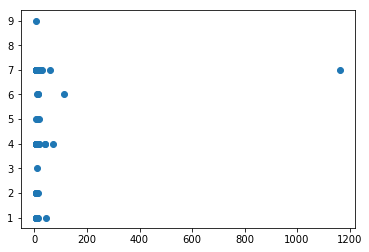

0     1  2         3                                                  4
42     7     7  7  0.285714                           {4: 2, 5: 2, 6: 1, 7: 2}
0   1164  1164  7  0.302405  {1: 150, 2: 169, 3: 44, 4: 223, 5: 116, 6: 84,...
33     8     8  6  0.375000                                 {1: 2, 5: 3, 6: 3}
61     5     5  1  0.400000                           {1: 2, 2: 1, 5: 1, 6: 1}
56     5     5  4  0.400000                                 {1: 2, 3: 1, 4: 2}
52     5     5  7  0.400000                                 {2: 2, 5: 1, 7: 2}
68     5     5  7  0.400000                                 {2: 2, 4: 1, 7: 2}
2     70    70  4  0.400000           {1: 14, 2: 1, 3: 1, 4: 28, 5: 15, 6: 11}
4     44    44  1  0.409091                         {1: 18, 4: 16, 5: 4, 6: 6}
29     9     9  5  0.444444                           {9: 1, 4: 3, 5: 4, 7: 1}
19    13    13  6  0.461538                                 {1: 4, 5: 3, 6: 6}
7     27    27  7  0.481481                   {1: 1, 2: 11, 4: 1, 5: 1, 7: 13}
6     39    39  4  0.487179                               {1: 19, 4: 19, 7: 1}
35     8     8  7  0.500000                                 {3: 2, 5: 2, 7: 4}
48     6     6  2  0.500000                                 {2: 3, 5: 2, 7: 1}
28    10    10  4  0.500000                                       {1: 5, 4: 5}
12    18    18  5  0.500000                           {1: 2, 2: 1, 5: 9, 7: 6}
51     6     6  5  0.500000                                       {1: 3, 5: 3}
25    11    11  4  0.545455                                       {3: 5, 4: 6}
24    11    11  1  0.545455                                 {1: 6, 5: 1, 6: 4}
44     7     7  7  0.571429                                       {3: 3, 7: 4}
40     7     7  1  0.571429                                 {1: 4, 4: 1, 5: 2}
16    14    14  7  0.571429                                       {2: 6, 7: 8}
54     5     5  4  0.600000                                       {4: 3, 5: 2}
55     5     5  4  0.600000                                       {1: 2, 4: 3}
58     5     5  2  0.600000                                       {2: 3, 7: 2}
60     5     5  7  0.600000                                       {5: 2, 7: 3}
34     8     8  2  0.625000                                       {2: 5, 7: 3}
23    11    11  3  0.636364                                       {3: 7, 7: 4}
49     6     6  4  0.666667                                 {1: 1, 3: 1, 4: 4}
..   ...   ... ..       ...                                                ...
31     9     9  7  0.777778                                 {4: 1, 5: 1, 7: 7}
10    19    19  4  0.789474                                      {1: 4, 4: 15}
57     5     5  4  0.800000                                       {4: 4, 7: 1}
53     5     5  4  0.800000                                       {1: 1, 4: 4}
65     5     5  1  0.800000                                       {1: 4, 4: 1}
27    11    11  1  0.818182                                       {1: 9, 4: 2}
21    12    12  7  0.833333                                      {2: 2, 7: 10}
47     6     6  4  0.833333                                       {4: 5, 5: 1}
41     7     7  1  0.857143                                       {1: 6, 4: 1}
43     7     7  1  0.857143                                       {1: 6, 4: 1}
36     8     8  1  0.875000                                       {1: 7, 2: 1}
32     8     8  7  0.875000                                       {2: 1, 7: 7}
37     8     8  7  0.875000                                       {2: 1, 7: 7}
26    11    11  1  0.909091                                      {1: 10, 5: 1}
18    13    13  4  0.923077                                      {1: 1, 4: 12}
5     40    40  4  0.950000                                      {1: 2, 4: 38}
8     23    23  7  0.956522                                      {2: 1, 7: 22}
46     7     7  1  1.000000                                             {1: 7}
45     7     7  7  1.000000                              

In [29]:
cmty_kcore(4)

In [66]:
df.shape,modularity

((83, 4), 0.8398005515615696)